# Exercício 05
## Planejamento de Experimentos
### Alunos:

- Francielle Alves vargas

---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

## Funções novas utilizadas no exercício

- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)






---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

Dada a introdução acima, já definimos que o tipo do problema é classificação. Defina quais os atributos você utilizará, e a medida de avaliação você acha adequada e explique o porquê dessas escolhas. Você também deve fazer nessa questão os pré-processamentos que achar necessário.

Lembre-se que o objetivo da classificação é fazer predições para dados não vistos, ou seja, quando o algoritmo for colocado em produção ele classificará corretamente amostras não vistas.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

#converts the sklearn 'cancer' bunch in dataframe data
cancer = load_breast_cancer()
columns = np.append(cancer.feature_names, ["target"])
data = np.c_[cancer.data, cancer.target]
pd.DataFrame(data, columns=columns)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

df = pd.DataFrame(data, columns=columns)

X = df.iloc[:, :-1] #atributos
y = df.iloc[:, -1] #classe


#Padronizando as features
x = StandardScaler().fit_transform(X)

#Aplicando o PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component1', 'principal_component2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

print(finalDf.shape)
print(finalDf)
#Vou usar para mediar a performance a acurácia balanceada (sklearn.metrics.balanced_accuracy_score)

(569, 3)
     principal_component1  principal_component2  target
0                9.192837              1.948583     0.0
1                2.387802             -3.768172     0.0
2                5.733896             -1.075174     0.0
3                7.122953             10.275589     0.0
4                3.935302             -1.948072     0.0
..                    ...                   ...     ...
564              6.439315             -3.576817     0.0
565              3.793382             -3.584048     0.0
566              1.256179             -1.902297     0.0
567             10.374794              1.672010     0.0
568             -5.475243             -0.670637     1.0

[569 rows x 3 columns]




---

### Questão 02.
Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...), ou da chamada dimensão VC (Vapnik-Chervonenkis) do classificador. A dimensão VC é um tópico mais avançado e faz parte da chamada teoria do aprendizado estatístico, ela é citada aqui apenas como curiosidade não é esperado que saibem sobre isso.

Execute a função *classificacao* definida no notebook com a medida de desempenho que você definiu. Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


def classificacao(data, columns, target, score=balanced_accuracy_score, score_name='acurácia', 
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    #Inicializa estruturas para matrizes de confusão 
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)        
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}


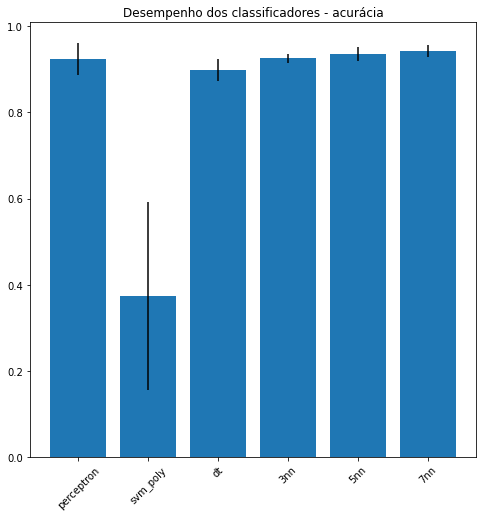

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=5690, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=56,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [4]:
X_train = [0,1]
y_train = [2]
classificacao(finalDf, X_train, y_train)
#O melhor modelo é o 7NN, pois apesar da acurácia ser similar ao 3NN ele apresenta menor desvio padrão

---

### Questão 03.

Utilizar os 3 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;
- Boostrap (1000 amostras de boostrap).

Para o dataset escolhido, executar os 3 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Para o 10-fold Cross Validation e o leave-one-out, você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.
  * Já para o boostrap, você vai precisar implementar a função classificação modificada `classificacao_bootstrap`. A seção de interesse que vocês precisarão modificar está destacada na função. No cálculo do bootstrap utilize 80% do dataset para treino e 20% para teste.

Essas execuções podem demorar um pouco, então tenham paciência.

**No material complementar há exemplos de como fazer o bootstrap**

In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score

def classificacao_bootstrap(data, columns, target, score=balanced_accuracy_score, no_bs=1000, p_teste=0.2, score_name='acurácia', plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    no_bs:      Número de repetições do bootstrap
    p_teste:    Porcentagem para teste da amostra do bootstrap
    score_name: String. Uma string com o nome da medida de desempenho    
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }
    no_exemplos = df.shape[0]
    p_treino = 0.8
    p_teste = 1 - p_treino
    no_bootstrap = 1000

    #itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
      scores = []
      for i in range(0, no_bs):
#---------------------------------Copiei o código do exemplo Bootstraping no Pandas aqui-------------------------------------------------

        amostra = finalDf.sample(n = no_exemplos, replace=True) # Obtendo amostra do bootstrap
  
        X = amostra.iloc[:, 0:1] # Separando em dados 
        y = amostra.iloc[:, -1]  # e variável alvo
      
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=p_teste) # Split dos dados de maneira estratificada (mantendo prop. das classes)

        data_train = finalDf # Criando um dataframe com os dados de treino
        X_train, y_train = data_train.iloc[:, 0:1], data_train.iloc[:, -1] # reatribuição dos dados pra treino (agora superamostrados)

        c.fit(X_train, y_train)  
        y_pred = c.predict(X_test)
        scores.append(balanced_accuracy_score(y_test, y_pred))

        # realiza predição no conjunto de teste e salva o resultado
        results[c_name].append( score(y_test, y_pred) )
        confusion_matrices[c_name] += confusion_matrix(y_test, y_pred) 

        print("Score do classificador utilizando Bootstrap de tamanho %d: %.2f%%" % (no_bootstrap, np.mean(scores)*100))
#------------------------------------------------------------------------------------------------------------------------------------------    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}


In [7]:
#10-fold Cross Validation 
def classificacao2(data, columns, target, score=balanced_accuracy_score, score_name='acurácia', 
                  folds=10, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    #Inicializa estruturas para matrizes de confusão 
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            #confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)        
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}


---

### Questão 03.

Utilizar os 3 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;
- Boostrap (1000 amostras de boostrap).

Para o dataset escolhido, executar os 3 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Para o 10-fold Cross Validation e o leave-one-out, você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.
  * Já para o boostrap, você vai precisar implementar a função classificação modificada `classificacao_bootstrap`. A seção de interesse que vocês precisarão modificar está destacada na função. No cálculo do bootstrap utilize 80% do dataset para treino e 20% para teste.

Essas execuções podem demorar um pouco, então tenham paciência.

**No material complementar há exemplos de como fazer o bootstrap**

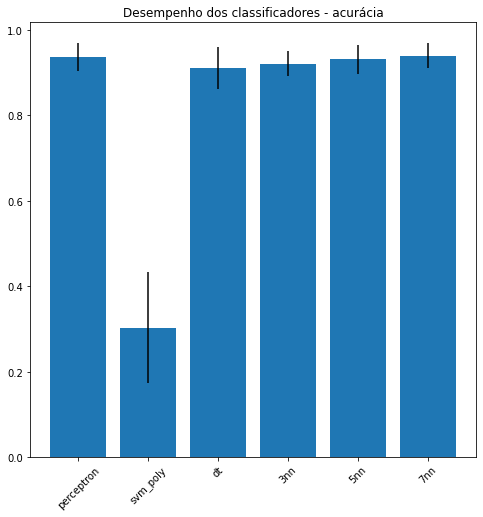

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=5690, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=56,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [8]:
#10-fold Cross Validation 
#Leave-one-out
X_train = [0,1]
y_train = [2]
classificacao2(finalDf, X_train, y_train)

In [ ]:
#Boostrap (1000 amostras de boostrap)
X_train = [0,1]
y_train = [2]
classificacao_bootstrap(finalDf, X_train, y_train)

Score do classificador utilizando Bootstrap de tamanho 10: 91.27%
Score do classificador utilizando Bootstrap de tamanho 10: 91.43%
Score do classificador utilizando Bootstrap de tamanho 10: 90.53%
Score do classificador utilizando Bootstrap de tamanho 10: 91.13%
Score do classificador utilizando Bootstrap de tamanho 10: 90.87%
Score do classificador utilizando Bootstrap de tamanho 10: 90.60%
Score do classificador utilizando Bootstrap de tamanho 10: 90.50%
Score do classificador utilizando Bootstrap de tamanho 10: 90.13%
Score do classificador utilizando Bootstrap de tamanho 10: 90.14%
Score do classificador utilizando Bootstrap de tamanho 10: 90.24%
Score do classificador utilizando Bootstrap de tamanho 10: 89.93%
Score do classificador utilizando Bootstrap de tamanho 10: 89.63%
Score do classificador utilizando Bootstrap de tamanho 10: 89.80%
Score do classificador utilizando Bootstrap de tamanho 10: 89.91%
Score do classificador utilizando Bootstrap de tamanho 10: 89.48%
Score do c



---

### Questão 04.

Utilizando o 10-fold cross validation, calcule as medidas de avaliação baseadas na matriz de confusão (TFP, TFN, TVN, TVP). Como em meio a tantas medidas de avaliação, comparar os classificadores? Como escolher o melhor?

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

_3nn = np.array([[194,18],[19,338]])
_5nn = np.array([[192, 20],[17,340]])
_7nn = np.array([[196, 16],[13, 344]])
dt  = np.array([[183, 29],[26, 331]])
perceptron = np.array([[202, 10], [17, 340]])
svm_poly = np.array([[115, 97], [196, 161]])

print('--------------------TFP-----------------------')
TFP_3nn = 19/(19+338)
TFP_5nn = 17/(17+340)
TFP_7nn= 13/(13+344)
TFP_dt = 26/(26+331)
TFP_perceptron = 17/(17+340)

print('_3nn:', TFP_3nn)
print('_5nn:', TFP_5nn)
print('_7nn:', TFP_7nn)
print('dt:', TFP_dt)
print('perceptron:', TFP_perceptron)

print('--------------------TFN-----------------------')
TFN_3nn = 18/(18+194)
TFN_5nn = 20/(20+192)
TFN_7nn = 16/(16+196)
TFN_dt = 29/(29+183)
TFN_perceptron = 10/(10+202)


print('_3nn:', TFN_3nn)
print('_5nn:', TFN_5nn)
print('_7nn:', TFN_7nn)
print('dt:', TFN_dt)
print('perceptron:', TFN_perceptron)

print('--------------------TVN-----------------------')
TVN_3nn = 18/(18+338)
TVN_5nn = 20/(20+340)
TVN_7nn = 16/(16+344)
TVN_dt = 29/(29+331)
TVN_perceptron = 10/(10+340)

print('_3nn:', TVN_3nn)
print('_5nn:', TVN_5nn)
print('_7nn:', TVN_7nn)
print('dt:', TVN_dt)
print('perceptron:', TVN_perceptron)

print('--------------------TVP-----------------------')
TVP_3nn = 19/(19+194)
TVP_5nn = 17/(17+192)
TVP_7nn = 13/(13+196)
TVP_dt = 26/(26+183)
TVP_perceptron = 17/(17+202)


print('_3nn:', TVP_3nn)
print('_5nn:', TVP_5nn)
print('_7nn:', TVP_7nn)
print('dt:', TVP_dt)
print('perceptron:', TVP_perceptron)

#Como escolher o melhor classificador: Escolher o classificador que apresente a diagonal VP VN (maximazada) e a diagonal FP FN (minimizada)